<a href="https://colab.research.google.com/github/kurosakiichig/glove_matrix-/blob/main/problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형 감소 가중치 적용 동시출현 행렬:
 [[0.         0.         1.         0.         0.         0.
  0.         0.         0.5       ]
 [0.         0.         0.         1.         0.5        0.
  0.33333334 1.         0.5       ]
 [1.         0.         0.         0.         0.         1.
  0.33333334 0.         1.5       ]
 [0.         1.         0.         0.         1.         0.
  0.5        0.5        0.6666667 ]
 [0.         0.5        0.         1.         0.         0.33333334
  1.         0.33333334 0.5       ]
 [0.         0.         1.         0.         0.33333334 0.
  0.5        0.         1.        ]
 [0.         0.33333334 0.33333334 0.5        1.         0.5
  0.         0.         1.        ]
 [0.         1.         0.         0.5        0.33333334 0.
  0.         0.         1.        ]
 [0.5        0.5        1.5        0.6666667  0.5        1.
  1.         1.         0.        ]]
지수 감소 가중치 적용 동시출현 행렬:
 [[0.         0.         0.36787945 0.         0.         0.
  0.         0.     

<ipython-input-2-f61021b1b3a2>:62: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f61021b1b3a2>:62: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f61021b1b3a2>:62: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f61021b1b3a2>:62: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f61021b1b3a2>:62: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f61021b1b3a2>:62: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-f61021b1b3a2>:62: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-in

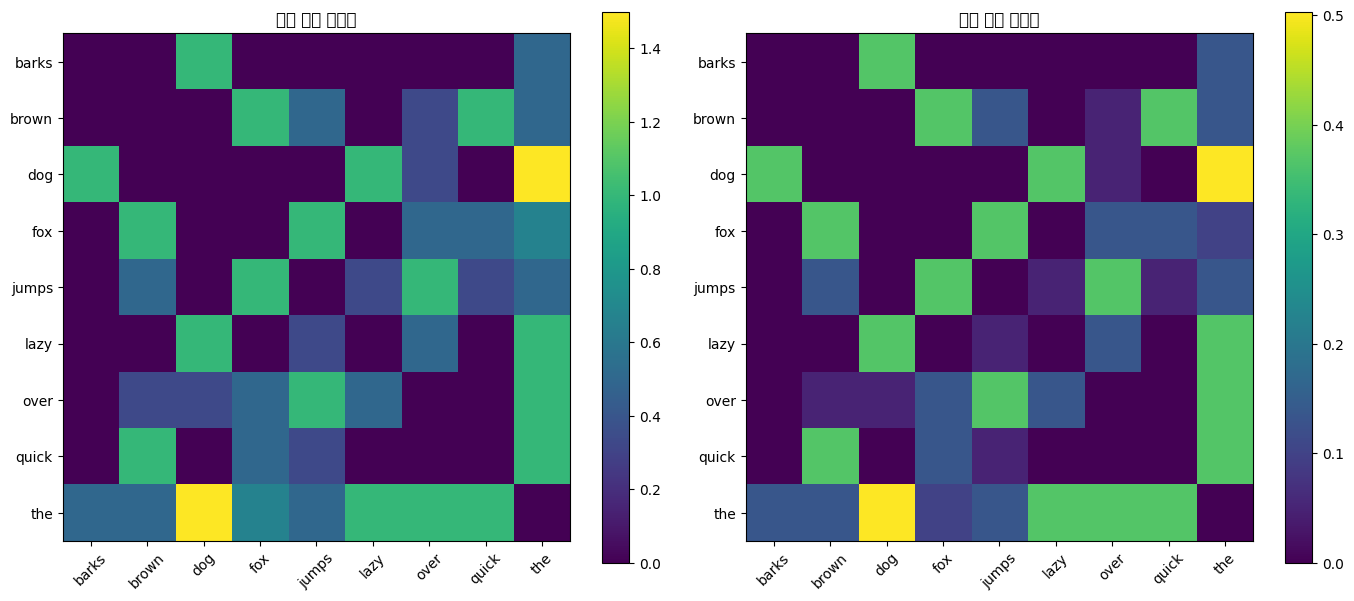

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


def linear_weight(distance):
    return 1.0 / distance

def exponential_weight(distance):
    return math.exp(-distance)


def build_weighted_cooccurrence_matrix(tokenized_corpus, word2idx, window_size=3, weight_func=linear_weight):
    vocab_size = len(word2idx)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.float32)

    for sentence in tokenized_corpus:
        for i, word in enumerate(sentence):
            center_idx = word2idx[word]

            for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
                if i != j:
                    distance = abs(i - j)
                    weight = weight_func(distance)
                    context_idx = word2idx[sentence[j]]
                    co_matrix[center_idx, context_idx] += weight
    return co_matrix


tokenized_corpus = [
    ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'],
    ['the', 'dog', 'barks']
]
vocab = sorted(list(set(word for sentence in tokenized_corpus for word in sentence)))
word2idx = {word: idx for idx, word in enumerate(vocab)}


co_matrix_linear = build_weighted_cooccurrence_matrix(tokenized_corpus, word2idx, window_size=3, weight_func=linear_weight)
co_matrix_exponential = build_weighted_cooccurrence_matrix(tokenized_corpus, word2idx, window_size=3, weight_func=exponential_weight)

print("선형 감소 가중치 적용 동시출현 행렬:\n", co_matrix_linear)
print("지수 감소 가중치 적용 동시출현 행렬:\n", co_matrix_exponential)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
im0 = axes[0].imshow(co_matrix_linear, interpolation='nearest', cmap='viridis')
axes[0].set_title("선형 감소 가중치")
axes[0].set_xticks(np.arange(len(vocab)))
axes[0].set_xticklabels(vocab, rotation=45)
axes[0].set_yticks(np.arange(len(vocab)))
axes[0].set_yticklabels(vocab)
fig.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(co_matrix_exponential, interpolation='nearest', cmap='viridis')
axes[1].set_title("지수 감소 가중치")
axes[1].set_xticks(np.arange(len(vocab)))
axes[1].set_xticklabels(vocab, rotation=45)
axes[1].set_yticks(np.arange(len(vocab)))
axes[1].set_yticklabels(vocab)
fig.colorbar(im1, ax=axes[1])
plt.tight_layout()
plt.show()